# Time Series Decomposition

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import STL

sns.set_context('talk')

## Load Data

In [2]:
with open('./data/27-bulk_loaded_BDG690XU_202302031452_202302031549.json') as f:
    d = json.load(f)

df_ = pd.json_normalize(d)
df = df_.copy(deep=True)
df = df.rename(columns={"attributes.adc1":"adc", 'attributes.battery':'battery', 'attributes.power':'power','attributes.totalDistance':'totalDistance'}, errors='raise')
df['deviceTime'] = pd.to_datetime(df['deviceTime'])
df = df.set_index('deviceTime')
len(df)
df = df.loc[(df['adc'] >= 1540) & (df['adc'] <= 3460)]
#df.info()
#df

## Using STL to extract ADC trend and seasonality

In [3]:
y = df['adc'].to_numpy()
# y

In [4]:
type(y)

numpy.ndarray

In [5]:
x = np.arange(0, len(y))
# x

## Exploring the frac parameter

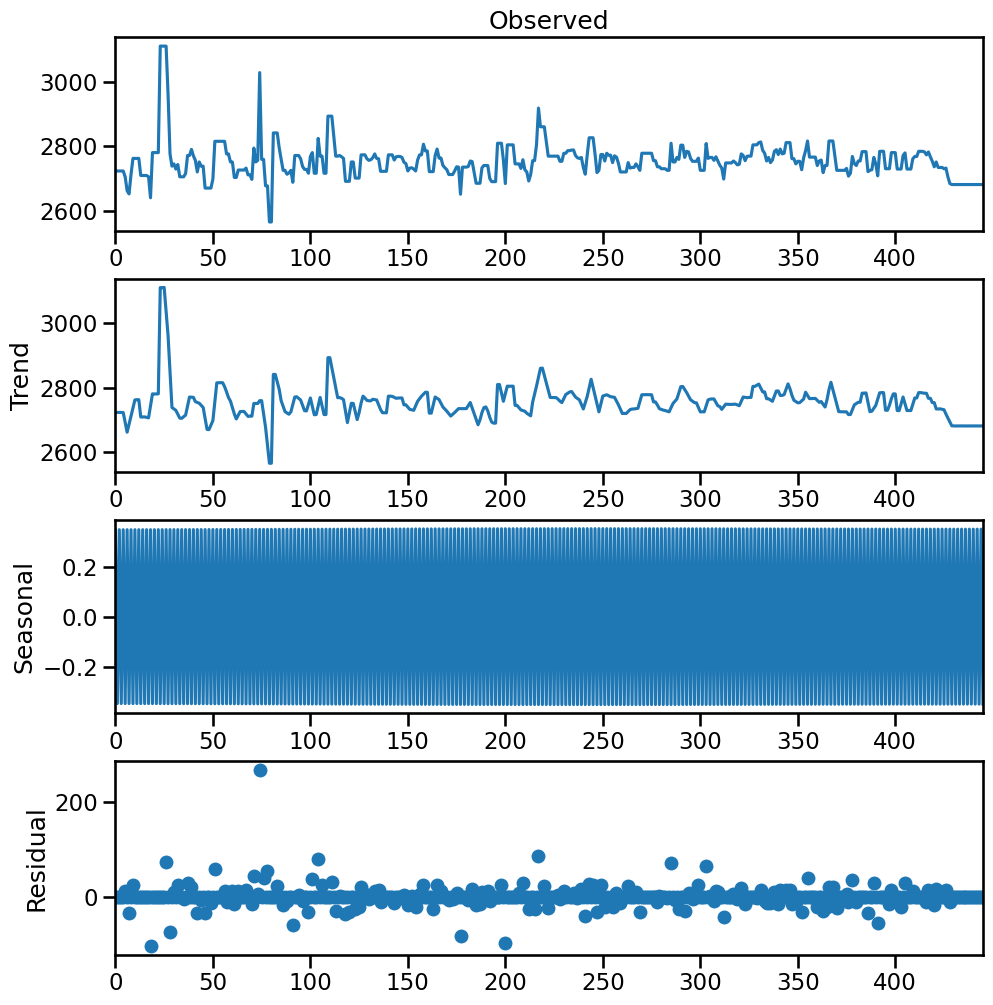

In [6]:
# The input of lowess need to be numpy arrays and numeric type

res = STL(endog=y,     # the y values
          period=2,    # The periodicty of the seasonal component
          seasonal=1001,  # Determine the window size for LOESS used 
                       # when smoothing the seasonal component
          seasonal_deg=0, # Fit a constant value (i.e., flat line) rather
                            # than linear regression during LOWESS smoothing
                       # of the seasonal component
          robust=True  # Flag to use robust regression value when 
                       # fitting the LOWESS curves so the fit 
                       # is robust to outliers
         ).fit()

# Plot the full decomposition
plt.rc('figure', figsize=(10,10))
plt.rc('font', size=5)
res.plot();

<AxesSubplot: title={'center': 'Total Distance'}, xlabel='deviceTime'>

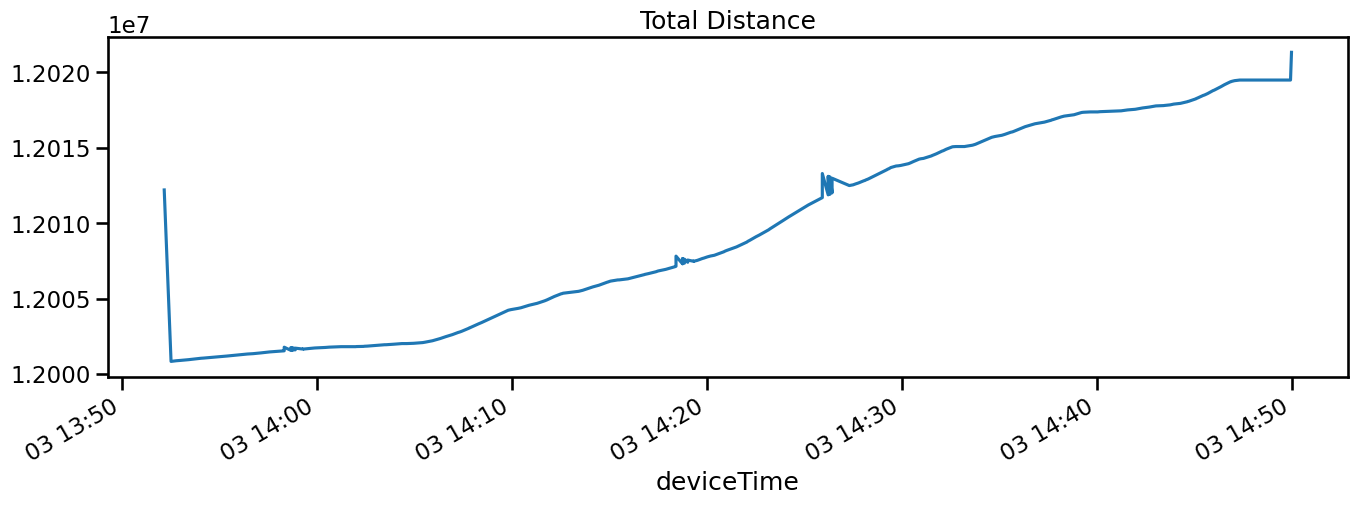

In [7]:
fig, ax = plt.subplots(figsize=[16,5])
ax.set_title('Total Distance')
df['totalDistance'].plot()

<AxesSubplot: title={'center': 'Battery'}, xlabel='deviceTime'>

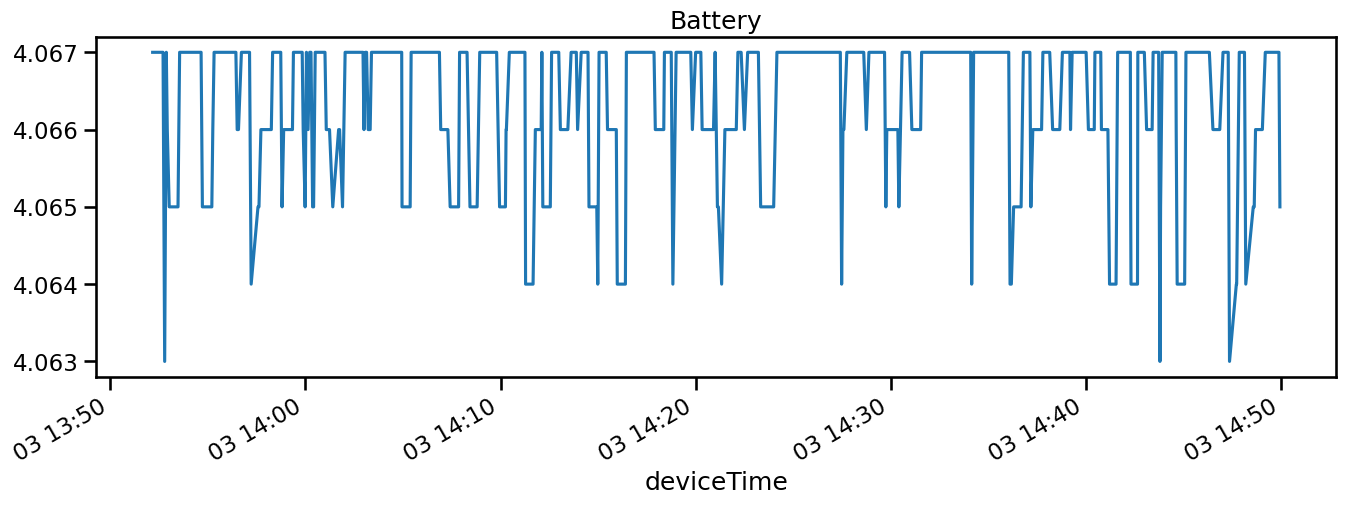

In [8]:
fig, ax = plt.subplots(figsize=[16,5])
ax.set_title('Battery')
df['battery'].plot()

<AxesSubplot: title={'center': 'Power'}, xlabel='deviceTime'>

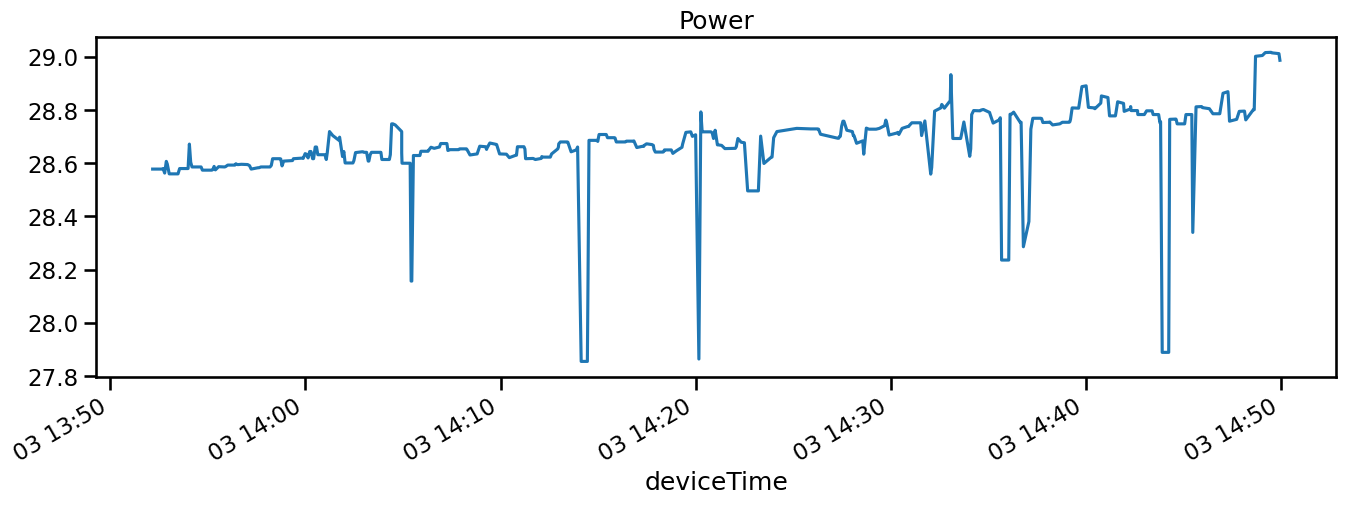

In [9]:
fig, ax = plt.subplots(figsize=[16,5])
ax.set_title('Power')
df['power'].plot()

<AxesSubplot: title={'center': 'Speed'}, xlabel='deviceTime'>

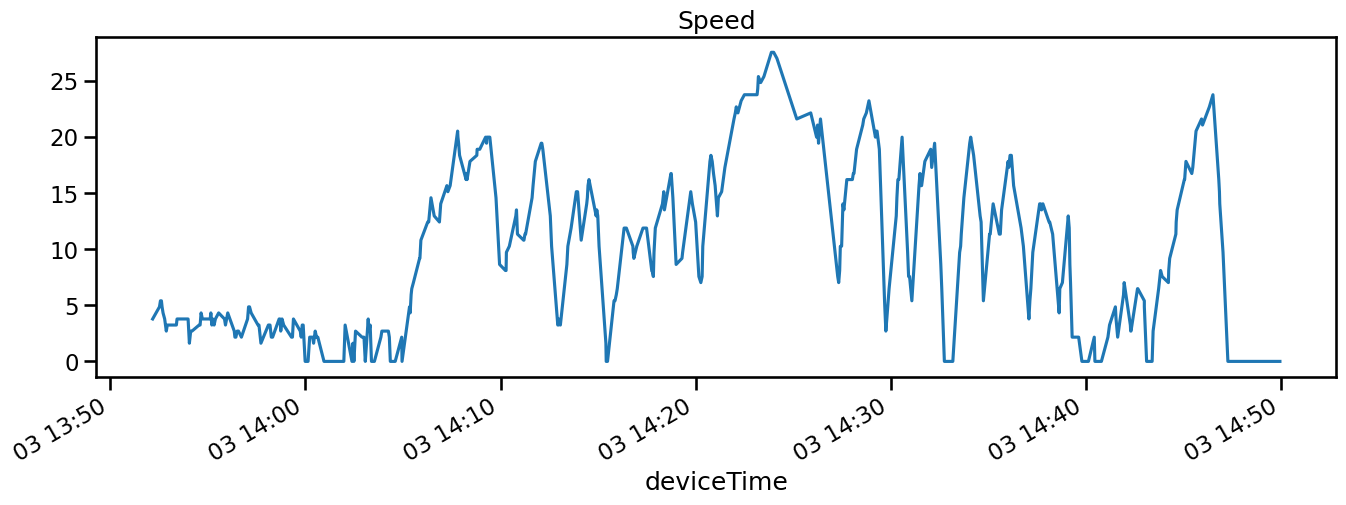

In [10]:
fig, ax = plt.subplots(figsize=[16,5])
ax.set_title('Speed')
df['speed'].plot()